In [1]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
data_sliced = pd.read_csv('./data/dataset_sliced.csv')



In [3]:
X_sliced = data_sliced.iloc[:, 0:17]
y_sliced = data_sliced.iloc[:, 18]


In [4]:
X_sliced_train, X_sliced_val, y_sliced_train,  y_sliced_val = train_test_split(X_sliced, y_sliced, test_size=0.4, random_state=42)
print(X_sliced_train.shape, y_sliced_train.shape, X_sliced_val.shape, y_sliced_val.shape)

(38818, 17) (38818,) (25879, 17) (25879,)


In [5]:
forest_sliced = RandomForestRegressor(criterion='mae', max_depth=15, n_estimators=1000,n_jobs=-1)
forest_sliced.fit(X_sliced_train, y_sliced_train)
y_sliced_test_pred = forest_sliced.predict(X_sliced_val)
mean_absolute_error(y_sliced_val,y_sliced_test_pred)

5.773120903813353

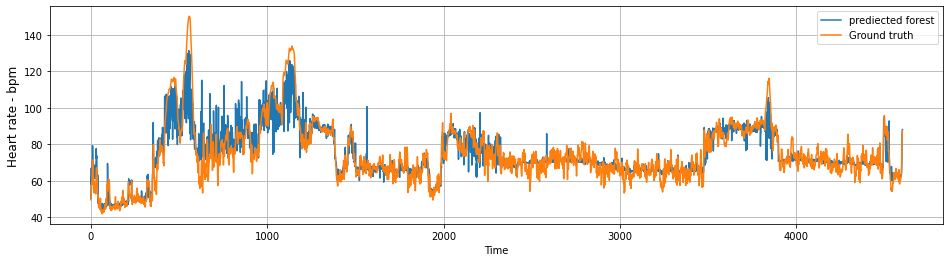

In [6]:
S1_sliced = data_sliced.loc[data_sliced['Subject'] == 'S1']
S1_sliced_X = S1_sliced.iloc[:, 0:17]
S1_sliced_y = S1_sliced.iloc[:, 18]
plt.figure(figsize=(16,4))
plt.grid(True)
plt.plot( forest_sliced.predict(S1_sliced_X), label = 'prediected forest')
plt.plot( S1_sliced_y, label = 'Ground truth')
plt.legend()
plt.ylabel('Heart rate - bpm', fontsize=12)
plt.xlabel('Time')
plt.show()

In [7]:
S1_pred_forest_sliced = forest_sliced.predict(S1_sliced_X)
mean_absolute_error(S1_pred_forest_sliced, S1_sliced_y)

4.420311362491793